In [13]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sb
#
#https://data.gov.il/dataset/covid-19/resource/9b623a64-f7df-4d0c-9f57-09bd99a88880
#
df = pd.read_csv("cases-among-vaccinated-201.csv", index_col=0)
df = df.fillna(0)
df = df.replace(['<5'],0)
#
#Set Language
language = "english" #german, else english
#
last_entry = df.index[-1] #Last Entry Date
#
if language == "german":
    s_titel1 = "Positive COVID-19 Fälle Israel (Gestapeltes Flächendiagramm)"
    s_subtitel1 = "Altersgruppen über 20 Jahre"
    s_subtitel2 = "Alle Altersgruppen"
    s_week = "Woche"
    s_xlbl1 = "Woche"
    s_fig2_suptitle = "COVID-19 Fälle Israel der letzten 10 Wochen"
    s_fig3_suptitle = "Verteilung positiver COVID-19 Fälle nach Impfstatus %s" %last_entry
    #
    s_1dose = "1. Dosis"
    s_2dose = "2. Dosis"
    s_3dose = "3. Dosis"
    s_unvac = "Nicht geimpft"
    #
    s_positive_1_6_days_after_1st_dose = "1-6 Tage nach 1. Dosis",
    s_positive_7_13_days_after_1st_dose = "7-13 Tage nach 1. Dosis",
    s_positive_14_20_days_after_1st_dose = "14-20 Tage nach 1. Dosis",
    s_positive_above_20_days_after_1st_dose = ">20 Tage nach 1. Dosis",
    s_positive_1_6_days_after_2nd_dose = "1-6 Tage nach 2. Dosis",
    s_positive_7_13_days_after_2nd_dose = "7-13 Tage nach 2. Dosis",
    s_positive_14_30_days_after_2nd_dose = "14-30 Tage nach 2. Dosis",
    s_positive_31_90_days_after_2nd_dose = "31-90 Tage nach 2. Dosis",
    s_positive_above_3_month_after_2nd_before_3rd_dose = ">90 Tage nach 2. Dosis",
    s_positive_1_6_days_after_3rd_dose = "1-6 Tage nach 3. Dosis",
    s_positive_7_13_days_after_3rd_dose = "7-13 Tage nach 3. Dosis",
    s_positive_14_30_days_after_3rd_dose = "14-30 Tage nach 3. Dosis",
    s_positive_31_90_days_after_3rd_dose = "31-90 Tage nach 3. Dosis",
    s_positive_above_90_days_after_3rd_dose = ">90 Tage nach 3. Dosis",
    s_Sum_positive_without_vaccination = "Nicht geimpft"
    #
    s_heatmap_title = "Heatmap: positive Fälle nach Impfstatus (Israel)"
    s_heatmap_adults_abs = "positive Fälle (absolut)\n Alle Altersgruppen über 20 Jahre"
    s_heatmap_adults_rel = "Wachstum zur Vorwoche (in %)\n Alle Altersgruppen über 20 Jahre"
    s_heatmap_all_abs = "positive Fälle (absolut)\n Alle Altersgruppen"
    s_heatmap_all_rel = "Wachstum zur Vorwoche (in %)\n Alle Altersgruppen"
    #
    s_source = "Quellendaten: https://data.gov.il/dataset/covid-19/resource/9b623a64-f7df-4d0c-9f57-09bd99a88880"
    #
else:
    s_titel1 = "Positive COVID-19 Cases Israel (Stacked Area Chart)"
    s_subtitel1 = "Age groups over 20 years"
    s_subtitel2 = "All Age groups"
    s_week = "Week"
    s_xlbl1 = "Week"
    s_fig2_suptitle = "COVID-19 Cases Israel of the last 10 weeks"
    s_fig3_suptitle = "Distribution of positive COVID-19 Cases by Vaccination status %s" %last_entry
    #
    s_1dose = "1st Dose"
    s_2dose = "2nd Dose"
    s_3dose = "3rd Dose"
    s_unvac = "Not vaccinated"
    #
    s_positive_1_6_days_after_1st_dose = "1-6 days after 1st dose",
    s_positive_7_13_days_after_1st_dose = "7-13 days after 1st dose",
    s_positive_14_20_days_after_1st_dose = "14-20 days after 1st dose",
    s_positive_above_20_days_after_1st_dose = ">20 days after 1st dose",
    s_positive_1_6_days_after_2nd_dose = "1-6 days after 2nd dose",
    s_positive_7_13_days_after_2nd_dose = "7-13 days after 2nd dose",
    s_positive_14_30_days_after_2nd_dose = "14-30 days after 2nd dose",
    s_positive_31_90_days_after_2nd_dose = "31-90 days after 2nd dose",
    s_positive_above_3_month_after_2nd_before_3rd_dose = ">90 days after 2nd dose",
    s_positive_1_6_days_after_3rd_dose = "1-6 days after 3rd dose",
    s_positive_7_13_days_after_3rd_dose = "7-13 days after 3rd dose",
    s_positive_14_30_days_after_3rd_dose = "14-30 days after 3rd dose",
    s_positive_31_90_days_after_3rd_dose = "31-90 days after 3rd dose",
    s_positive_above_90_days_after_3rd_dose = ">90 days after 3rd dose",
    s_Sum_positive_without_vaccination = "Not vaccinated",
    #
    s_heatmap_title = "Heatmap: positive Cases by Vaccination Status (Israel)"
    s_heatmap_adults_abs = "positive Cases (absolute)\n All Age Groups over 20 Years"
    s_heatmap_adults_rel = "Growth from previous week (in %)\n All Age Groups over 20 Years"
    s_heatmap_all_abs = "positive Cases (absolute)\n All Age Groups"
    s_heatmap_all_rel = "Growth from previous week (in %)\n All Age Groups"
    #
    s_source = "Source data: https://data.gov.il/dataset/covid-19/resource/9b623a64-f7df-4d0c-9f57-09bd99a88880"
    #
#
colors = ["azure", "lightcyan", "paleturquoise", "darkturquoise", 
          "lightblue", "skyblue", "lightskyblue", "deepskyblue", "dodgerblue",
          "plum","violet","orchid","m","purple",
          "orange"]
#
#
df.index.names = [s_week] #renames Index to s_week value
df_adults = df[df.Age_group != "0-19"] #remove age_group 0-19 and assign it to df_adults
#with pd.option_context("max_rows", None): #uncomment to show whole dataframe
#  display(df_adults)
#df_adults
#df

In [14]:
del df['Age_group'] #remove age_groups from dataframe
df = df.apply(pd.to_numeric) #turn everything to float
df = df.groupby(level=0).sum() #sum to weekly level
df.rename(columns={"positive_1_6_days_after_1st_dose": "%s" % s_positive_1_6_days_after_1st_dose,
                   "positive_7_13_days_after_1st_dose": "%s" % s_positive_7_13_days_after_1st_dose,
                   "positive_14_20_days_after_1st_dose": "%s" % s_positive_14_20_days_after_1st_dose,
                   "positive_above_20_days_after_1st_dose": "%s" % s_positive_above_20_days_after_1st_dose,
                   "positive_1_6_days_after_2nd_dose": "%s" % s_positive_1_6_days_after_2nd_dose,
                   "positive_7_13_days_after_2nd_dose": "%s" % s_positive_7_13_days_after_2nd_dose,
                   "positive_14_30_days_after_2nd_dose": "%s" % s_positive_14_30_days_after_2nd_dose,
                   "positive_31_90_days_after_2nd_dose": "%s" % s_positive_31_90_days_after_2nd_dose,
                   "positive_above_3_month_after_2nd_before_3rd_dose": "%s" % s_positive_above_3_month_after_2nd_before_3rd_dose,
                   "positive_1_6_days_after_3rd_dose": "%s" % s_positive_1_6_days_after_3rd_dose,
                   "positive_7_13_days_after_3rd_dose": "%s" % s_positive_7_13_days_after_3rd_dose,
                   "positive_14_30_days_after_3rd_dose": "%s" % s_positive_14_30_days_after_3rd_dose,
                   "positive_31_90_days_after_3rd_dose": "%s" % s_positive_31_90_days_after_3rd_dose,
                   "positive_above_90_days_after_3rd_dose": "%s" % s_positive_above_90_days_after_3rd_dose,
                   "Sum_positive_without_vaccination": "%s" % s_Sum_positive_without_vaccination,
                   }, inplace=True)
#df

In [15]:
del df_adults['Age_group']
df_adults = df_adults.apply(pd.to_numeric)
df_adults = df_adults.groupby(level=0).sum()
df_adults.rename(columns={"positive_1_6_days_after_1st_dose": "%s" % s_positive_1_6_days_after_1st_dose,
                   "positive_7_13_days_after_1st_dose": "%s" % s_positive_7_13_days_after_1st_dose,
                   "positive_14_20_days_after_1st_dose": "%s" % s_positive_14_20_days_after_1st_dose,
                   "positive_above_20_days_after_1st_dose": "%s" % s_positive_above_20_days_after_1st_dose,
                   "positive_1_6_days_after_2nd_dose": "%s" % s_positive_1_6_days_after_2nd_dose,
                   "positive_7_13_days_after_2nd_dose": "%s" % s_positive_7_13_days_after_2nd_dose,
                   "positive_14_30_days_after_2nd_dose": "%s" % s_positive_14_30_days_after_2nd_dose,
                   "positive_31_90_days_after_2nd_dose": "%s" % s_positive_31_90_days_after_2nd_dose,
                   "positive_above_3_month_after_2nd_before_3rd_dose": "%s" % s_positive_above_3_month_after_2nd_before_3rd_dose,
                   "positive_1_6_days_after_3rd_dose": "%s" % s_positive_1_6_days_after_3rd_dose,
                   "positive_7_13_days_after_3rd_dose": "%s" % s_positive_7_13_days_after_3rd_dose,
                   "positive_14_30_days_after_3rd_dose": "%s" % s_positive_14_30_days_after_3rd_dose,
                   "positive_31_90_days_after_3rd_dose": "%s" % s_positive_31_90_days_after_3rd_dose,
                   "positive_above_90_days_after_3rd_dose": "%s" % s_positive_above_90_days_after_3rd_dose,
                   "Sum_positive_without_vaccination": "%s" % s_Sum_positive_without_vaccination,
                   }, inplace=True)

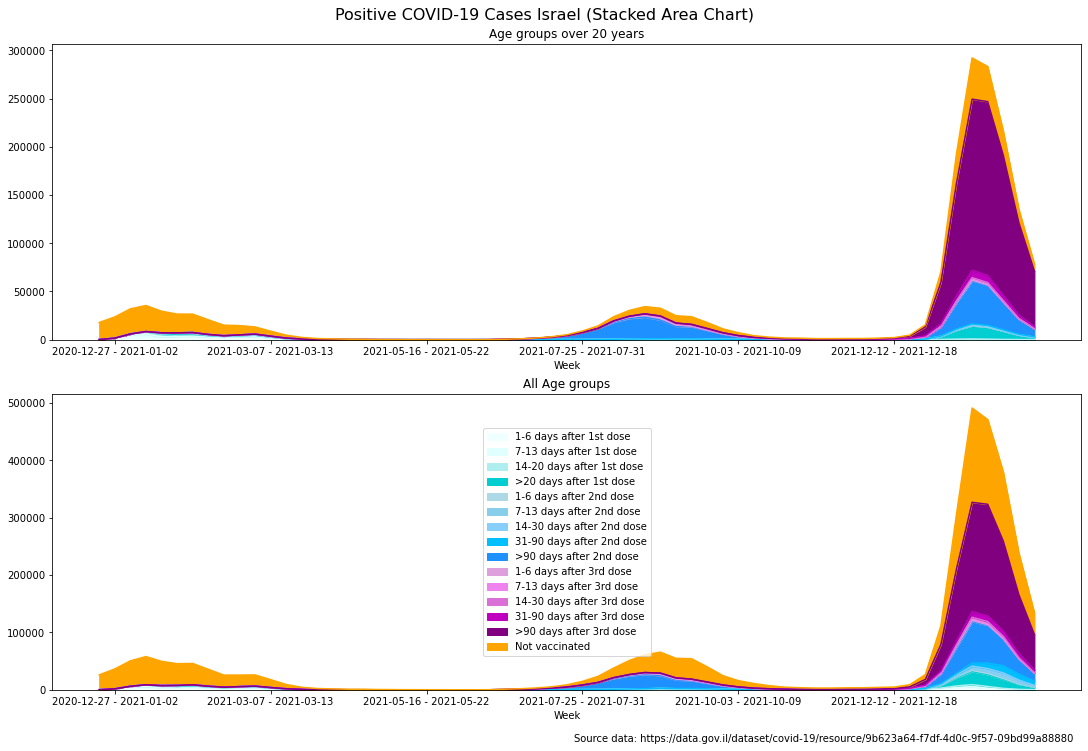

In [16]:
fig=plt.figure(figsize=(15,10),constrained_layout=True )
fig.suptitle(s_titel1, fontsize=16) #s_titel1
fig.tight_layout()
#
ax1=fig.add_subplot(211)
ax1.set_title(s_subtitel1) #s_subtitel1
#
ax2=fig.add_subplot(212)
ax2.set_title(s_subtitel2) #s_subtitel2
#
#
xtks = [1,11,21,31,41,51]
df_adults.plot.area(ax=ax1, color=colors, xlabel = s_week, xticks = xtks, legend=False)
df.plot.area(ax=ax2, color=colors, xlabel = s_xlbl1, xticks = xtks, legend=False)
plt.legend(loc='center')#, bbox_to_anchor=(1, 0.5))
plt.figtext(0.99, -0.025, s_source, horizontalalignment='right')
plt.savefig("israel_stacked_detail_%s.jpg" %language, format='jpg',dpi=150, bbox_inches='tight')

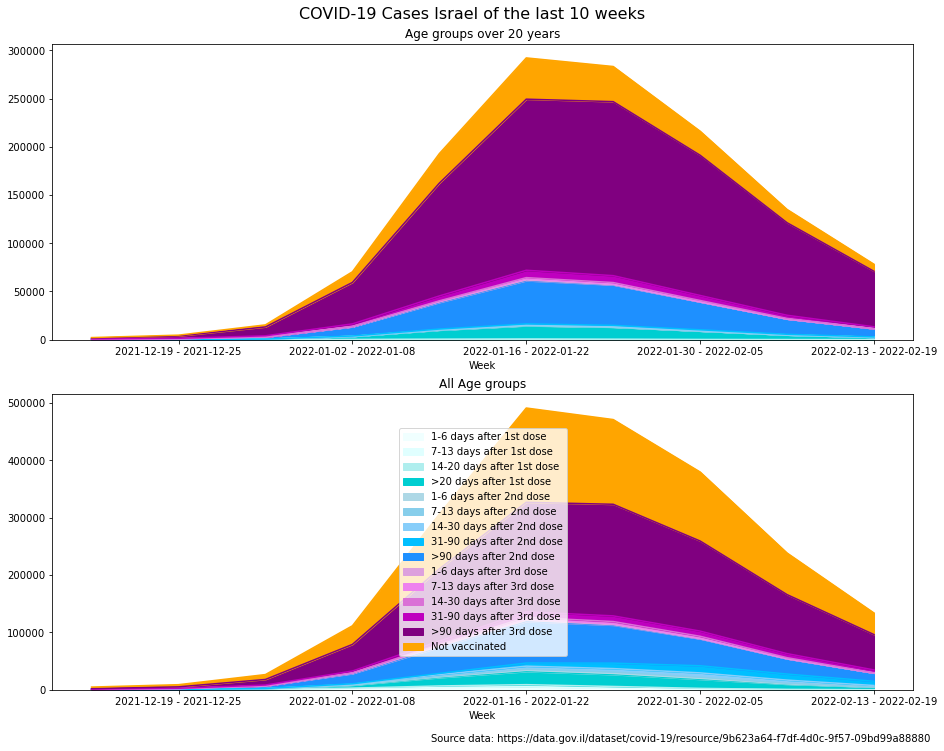

In [17]:
fig2=plt.figure(figsize=(13,10),constrained_layout=True )
fig2.suptitle(s_fig2_suptitle, fontsize=16)
fig2.tight_layout()

ax1=fig2.add_subplot(211)
ax1.set_title(s_subtitel1)
#
ax2=fig2.add_subplot(212)
ax2.set_title(s_subtitel2)
#
xtks = [1,3,5,7,9]
df_adults_recent = df_adults.tail(10)
df_recent = df.tail(10)
df_adults_recent.plot.area(ax=ax1, color=colors, xlabel = s_week, xticks = xtks, legend=False)
df_recent.plot.area(ax=ax2, color=colors, xlabel = s_xlbl1, xticks = xtks, legend=False)
plt.legend(loc='center')#, bbox_to_anchor=(1, 0.5))
plt.figtext(0.99, -0.025, s_source, horizontalalignment='right')
plt.savefig("israel_stacked_detail_recent_%s.jpg" %language, format='jpg',dpi=150, bbox_inches='tight')

In [18]:
#df_adults.tail()

In [19]:
sum_adults_first_shot = df_adults["%s" % s_positive_1_6_days_after_1st_dose] + df_adults["%s" % s_positive_7_13_days_after_1st_dose] + df_adults["%s" % s_positive_14_20_days_after_1st_dose] + df_adults["%s" % s_positive_above_20_days_after_1st_dose]
sum_adults_second_shot = df_adults["%s" % s_positive_1_6_days_after_2nd_dose] + df_adults["%s" % s_positive_7_13_days_after_2nd_dose] + df_adults["%s" % s_positive_14_30_days_after_2nd_dose] + df_adults["%s" % s_positive_31_90_days_after_2nd_dose] + df_adults["%s" % s_positive_above_3_month_after_2nd_before_3rd_dose]
sum_adults_third_shot = df_adults["%s" % s_positive_1_6_days_after_3rd_dose] + df_adults["%s" % s_positive_7_13_days_after_3rd_dose] + df_adults["%s" % s_positive_14_30_days_after_3rd_dose] + df_adults["%s" % s_positive_31_90_days_after_3rd_dose] + df_adults["%s" % s_positive_above_90_days_after_3rd_dose]
sum_adults_unvaccinated = df_adults["%s" % s_Sum_positive_without_vaccination]
#
df_sum_adults = pd.DataFrame()
df_sum_adults[s_1dose] = sum_adults_first_shot
df_sum_adults[s_2dose] = sum_adults_second_shot
df_sum_adults[s_3dose] = sum_adults_third_shot
df_sum_adults[s_unvac] = sum_adults_unvaccinated
#
df_sum_adults_no1d = df_sum_adults.drop(s_1dose, 1)
#
df_sum_adults.tail(10)

/var/folders/1r/4szl0y752x5dpjm5hqkghhlw0000gn/T/ipykernel_29067/2195496600.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_sum_adults_no1d = df_sum_adults.drop(s_1dose, 1)


,1st Dose,2nd Dose,3rd Dose,Not vaccinated
Week,,,,
2021-12-12 - 2021-12-18,56.0,470.0,1121.0,562
2021-12-19 - 2021-12-25,144.0,827.0,2876.0,881
2021-12-26 - 2022-01-01,572.0,2184.0,10482.0,2146
2022-01-02 - 2022-01-08,3410.0,9888.0,46076.0,11043
2022-01-09 - 2022-01-15,9886.0,28691.0,123775.0,30646
2022-01-16 - 2022-01-22,14413.0,46754.0,188282.0,42800
2022-01-23 - 2022-01-29,13003.0,43764.0,190126.0,36433
2022-01-30 - 2022-02-05,8937.0,30168.0,152186.0,24943
2022-02-06 - 2022-02-12,4860.0,16548.0,99892.0,13771


In [20]:
df_sum_adults.tail(10).pct_change()

,1st Dose,2nd Dose,3rd Dose,Not vaccinated
Week,,,,
2021-12-12 - 2021-12-18,NaN,NaN,NaN,NaN
2021-12-19 - 2021-12-25,1.571429,0.759574,1.565566,0.567616
2021-12-26 - 2022-01-01,2.972222,1.640871,2.644645,1.435868
2022-01-02 - 2022-01-08,4.961538,3.527473,3.395726,4.145853
2022-01-09 - 2022-01-15,1.899120,1.901598,1.686323,1.775152
2022-01-16 - 2022-01-22,0.457920,0.629570,0.521163,0.396593
2022-01-23 - 2022-01-29,-0.097828,-0.063952,0.009794,-0.148762
2022-01-30 - 2022-02-05,-0.312697,-0.310666,-0.199552,-0.315373
2022-02-06 - 2022-02-12,-0.456193,-0.451472,-0.343619,-0.447901


In [21]:
sum_all_first_shot = df["%s" % s_positive_1_6_days_after_1st_dose] + df["%s" % s_positive_7_13_days_after_1st_dose] + df["%s" % s_positive_14_20_days_after_1st_dose] + df["%s" % s_positive_above_20_days_after_1st_dose]
sum_all_second_shot = df["%s" % s_positive_1_6_days_after_2nd_dose] + df["%s" % s_positive_7_13_days_after_2nd_dose] + df["%s" % s_positive_14_30_days_after_2nd_dose] + df["%s" % s_positive_31_90_days_after_2nd_dose] + df["%s" % s_positive_above_3_month_after_2nd_before_3rd_dose]
sum_all_third_shot = df["%s" % s_positive_1_6_days_after_3rd_dose] + df["%s" % s_positive_7_13_days_after_3rd_dose] + df["%s" % s_positive_14_30_days_after_3rd_dose] + df["%s" % s_positive_31_90_days_after_3rd_dose] + df["%s" % s_positive_above_90_days_after_3rd_dose]
sum_all_unvaccinated = df["%s" % s_Sum_positive_without_vaccination]
#
df_sum_all = pd.DataFrame()
df_sum_all[s_1dose] = sum_all_first_shot
df_sum_all[s_2dose] = sum_all_second_shot
df_sum_all[s_3dose] = sum_all_third_shot
df_sum_all[s_unvac] = sum_all_unvaccinated
#
df_sum_all_no1d = df_sum_all.drop(s_1dose, 1)
#
df_sum_all.tail(10)

/var/folders/1r/4szl0y752x5dpjm5hqkghhlw0000gn/T/ipykernel_29067/3780295814.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_sum_all_no1d = df_sum_all.drop(s_1dose, 1)


,1st Dose,2nd Dose,3rd Dose,Not vaccinated
Week,,,,
2021-12-12 - 2021-12-18,228.0,664.0,1162.0,2739
2021-12-19 - 2021-12-25,483.0,1612.0,3060.0,3784
2021-12-26 - 2022-01-01,1708.0,4911.0,11443.0,8517
2022-01-02 - 2022-01-08,7973.0,20128.0,51035.0,32449
2022-01-09 - 2022-01-15,21223.0,52809.0,136799.0,95508
2022-01-16 - 2022-01-22,31817.0,87210.0,207815.0,164434
2022-01-23 - 2022-01-29,26585.0,86013.0,210838.0,147708
2022-01-30 - 2022-02-05,18275.0,70415.0,170716.0,120297
2022-02-06 - 2022-02-12,9589.0,44352.0,112032.0,72501


In [22]:
df_sum_all.tail(10).pct_change()

,1st Dose,2nd Dose,3rd Dose,Not vaccinated
Week,,,,
2021-12-12 - 2021-12-18,NaN,NaN,NaN,NaN
2021-12-19 - 2021-12-25,1.118421,1.427711,1.633391,0.381526
2021-12-26 - 2022-01-01,2.536232,2.046526,2.739542,1.250793
2022-01-02 - 2022-01-08,3.668033,3.098554,3.459932,2.809910
2022-01-09 - 2022-01-15,1.661859,1.623659,1.680494,1.943326
2022-01-16 - 2022-01-22,0.499175,0.651423,0.519127,0.721678
2022-01-23 - 2022-01-29,-0.164440,-0.013725,0.014547,-0.101719
2022-01-30 - 2022-02-05,-0.312582,-0.181345,-0.190298,-0.185576
2022-02-06 - 2022-02-12,-0.475294,-0.370134,-0.343752,-0.397317


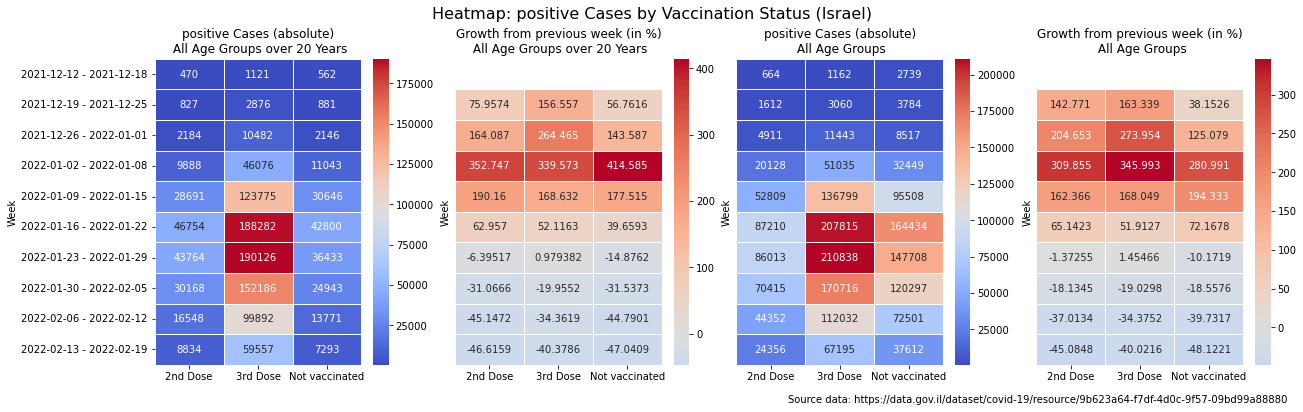

In [23]:
fig4=plt.figure(figsize=(18,5),constrained_layout=True)
fig4.suptitle(s_heatmap_title, fontsize=16, y=1.05)
#
df_h = df_sum_adults_no1d.tail(10)
df_h2 = df_sum_adults_no1d.tail(10).pct_change().mul(100)
#
df_h3 = df_sum_all_no1d.tail(10)
df_h4 = df_sum_all_no1d.tail(10).pct_change().mul(100)
#
ax10=fig4.add_subplot(141)
ax10.set_title(s_heatmap_adults_abs)
#
ax11=fig4.add_subplot(142)
ax11.set_title(s_heatmap_adults_rel)
#
ax12=fig4.add_subplot(143)
ax12.set_title(s_heatmap_all_abs)
#
ax13=fig4.add_subplot(144)
ax13.set_title(s_heatmap_all_rel)
#
#
sb.heatmap(df_h, ax=ax10, cmap="coolwarm", linewidths=0.5, annot=True, fmt="g")
sb.heatmap(df_h2, ax=ax11, cmap="coolwarm", yticklabels=False, center=0.00, annot=True, fmt="g", linewidths=0.5)
sb.heatmap(df_h3, ax=ax12, cmap="coolwarm", linewidths=0.5, yticklabels=False, annot=True, fmt="g")
sb.heatmap(df_h4, ax=ax13, cmap="coolwarm", yticklabels=False, center=0.00, annot=True, linewidths=0.5, fmt="g")
#plt.show()
plt.figtext(0.99, -0.05, s_source, horizontalalignment='right')
plt.savefig("israel_stacked_heatmap_%s.jpg" %language, format='jpg',dpi=150, bbox_inches='tight')

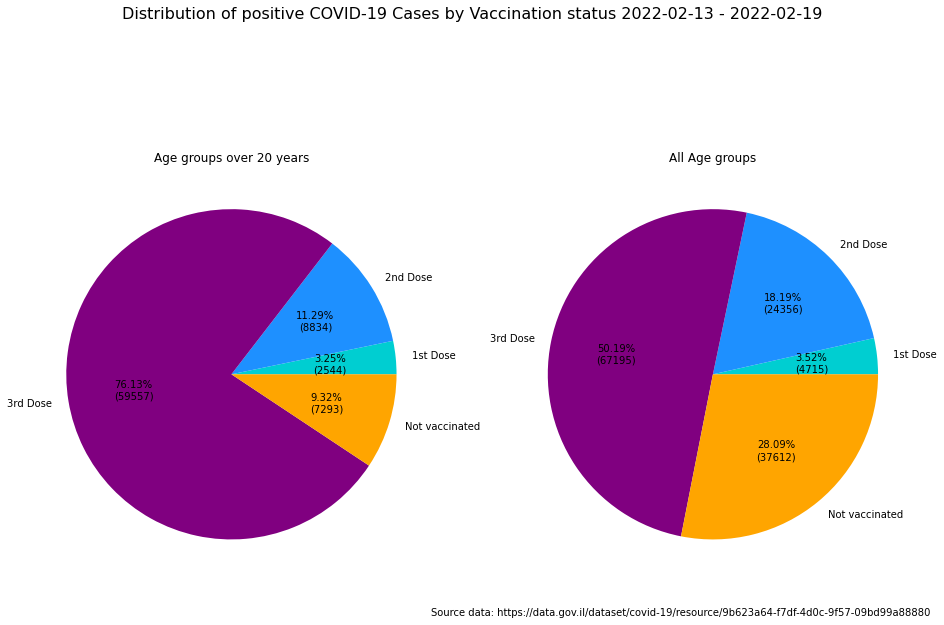

In [24]:
#
fig3=plt.figure(figsize=(13,10),constrained_layout=True)
fig3.suptitle(s_fig3_suptitle, fontsize=16)
#fig3.tight_layout()
ax5=fig3.add_subplot(121)
ax5.set_title(s_subtitel1)
#
ax6=fig3.add_subplot(122)
ax6.set_title(s_subtitel2)
#
abs_adults = df_sum_adults.iloc[-1]
abs_all = df_sum_all.iloc[-1]
#
pie_colors = ["darkturquoise","dodgerblue","purple","orange"]
#
df_sum_adults.iloc[-1].plot.pie(ax=ax5, colors=pie_colors,
                               autopct=lambda x: "{:.2f}%\n({:.0f})".format(x, x*abs_adults.sum()/100),ylabel="")
df_sum_all.iloc[-1].plot.pie(ax=ax6, colors=pie_colors,
                             autopct=lambda x: "{:.2f}%\n({:.0f})".format(x, x*abs_all.sum()/100),ylabel="")
plt.figtext(0.99, 0.15, s_source, horizontalalignment='right')
plt.savefig("israel_stacked_piechart_%s.jpg" %language, format='jpg',dpi=150, bbox_inches='tight')
#df_sum_adults.index[-1]